In [62]:
import os
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
warnings.filterwarnings('ignore', category=FutureWarning)

In [64]:
""""
Run these commands to avoid Output truncated
"""
#pd.set_option("display.max_rows", None)  # Show all rows
#pd.set_option("display.max_columns", None)  # Show all columns

'"\nRun these commands to avoid Output truncated\n'

# Reading CSV file from local route

In [65]:
def read_csv(dataset_path):
    current_path = os.getcwd()
    aux_curr_path = current_path
    project_path = aux_curr_path.replace('/notebooks', '')
    dataset_path = os.path.join(project_path, dataset_path)
    return dataset_path

In [66]:
CSV_PATH = "dataset/Datos_Imgenes.csv"

In [67]:
df = pd.read_csv(read_csv(CSV_PATH))
df.head(3)

,Index,Date,Model,ClassId,Page,TotalPages,PagesProcessed,Fields,EmptyFields,ModelApplied,ModelReported,Details,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType
0,0,2025-01-22T20:34:48-08:00,comprobante_domicilio,NaN,1,1,1,12,0,Lynx_ProofAddress_v6,NaN,CDOM-CFE[1|0.2],0.981,0.674,0.889,64.0,38.0,2523.0,263.0,CFE
1,1,2025-01-22T20:34:48-08:00,recibo_nomina,NaN,1,2,1,15,0,Lynx_ProofPaysheet_v5,NOM-IMSS[1|0.2],NOM-IMSS[1|0.2],0.948,0.931,0.943,399.0,42.0,17045.0,672.0,IMSS
2,2,2025-01-22T20:34:48-08:00,recibo_nomina,NaN,2,2,1,15,3,Lynx_ProofPaysheet_v5,NOM-IMSS[1|0.2],NOM-IMSS[1|0.2],0.941,0.837,0.910,166.0,29.0,4866.0,233.0,IMSS


# Check missing values per column 

By analyzing the data, we can identify that only two columns contain missing values: ClassID with 28,820 missing entries and ModelReported with 18,627. This is our initial assessment of the dataset; therefore, no actions, such as data removal, will be taken at this stage.

In [68]:
missing_values = df.isnull().sum()
missing_values

Index                 0
Date                  0
Model                 0
ClassId           28820
Page                  0
TotalPages            0
PagesProcessed        0
Fields                0
EmptyFields           0
ModelApplied          0
ModelReported     18627
Details               0
ConfR                 0
ConfA                 0
ConfW                 0
Sharpness             0
Contrast              0
Clarity               0
Resolution            0
DocType               0
dtype: int64

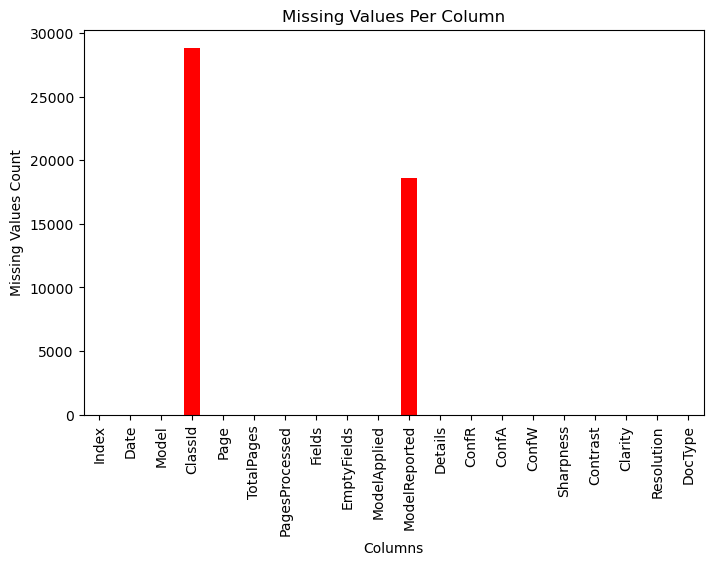

In [69]:
missing_values.plot(kind="bar", color="red", figsize=(8,5))
plt.xlabel("Columns")
plt.ylabel("Missing Values Count")
plt.title("Missing Values Per Column")
plt.show()

In [70]:
df.columns

Index(['Index', 'Date', 'Model', 'ClassId', 'Page', 'TotalPages',
       'PagesProcessed', 'Fields', 'EmptyFields', 'ModelApplied',
       'ModelReported', 'Details', 'ConfR', 'ConfA', 'ConfW', 'Sharpness',
       'Contrast', 'Clarity', 'Resolution', 'DocType'],
      dtype='object')

# Summary Stadistics for all columns 

In [71]:
df.describe(include="all")

,Index,Date,Model,ClassId,Page,TotalPages,PagesProcessed,Fields,EmptyFields,ModelApplied,ModelReported,Details,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution,DocType
count,62960.000000,62960,62960,34140,62960.000000,62960.000000,62960.000000,62960.000000,62960.000000,62960,44333,62960,62960.000000,62960.000000,62960.000000,62960.000000,62960.000000,62960.000000,62960.000000,62960
unique,NaN,27436,5,4,NaN,NaN,NaN,NaN,NaN,10,1639,1905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
top,NaN,2025-01-18T13:04:43-08:00,estado_cuenta,TXN,NaN,NaN,NaN,NaN,NaN,Lynx_BankingTXN_v5,NOM-IMSS[1|0.0],CLIB-CLIB[1|0.0],NaN,NaN,NaN,NaN,NaN,NaN,NaN,EC
freq,NaN,49,34140,26556,NaN,NaN,NaN,NaN,NaN,26467,1597,2952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26556
mean,47081.315025,NaN,NaN,NaN,2.934593,5.942186,3.326938,12.881210,3.495426,NaN,NaN,NaN,0.917741,0.791809,0.879958,224.199117,43.402370,10422.152731,457.302506,NaN
std,27193.866099,NaN,NaN,NaN,3.068428,4.682230,3.418311,13.533471,6.201645,NaN,NaN,NaN,0.128916,0.149599,0.091764,271.111842,11.423269,14534.007181,200.917008,NaN
min,0.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,0.001000,0.288000,0.152000,0.000000,0.000000,0.000000,0.000000,NaN
25%,23511.500000,NaN,NaN,NaN,1.000000,2.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,0.914000,0.699000,0.849000,92.000000,36.000000,3612.000000,321.000000,NaN
50%,46975.000000,NaN,NaN,NaN,2.000000,6.000000,1.000000,12.000000,0.000000,NaN,NaN,NaN,0.956000,0.841000,0.904000,153.000000,43.000000,6363.000000,429.000000,NaN
75%,71010.250000,NaN,NaN,NaN,4.000000,8.000000,5.000000,27.000000,3.000000,NaN,NaN,NaN,0.993000,0.915000,0.930000,232.000000,50.000000,9869.000000,568.229623,NaN


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62960 entries, 0 to 62959
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           62960 non-null  int64  
 1   Date            62960 non-null  object 
 2   Model           62960 non-null  object 
 3   ClassId         34140 non-null  object 
 4   Page            62960 non-null  int64  
 5   TotalPages      62960 non-null  int64  
 6   PagesProcessed  62960 non-null  int64  
 7   Fields          62960 non-null  int64  
 8   EmptyFields     62960 non-null  int64  
 9   ModelApplied    62960 non-null  object 
 10  ModelReported   44333 non-null  object 
 11  Details         62960 non-null  object 
 12  ConfR           62960 non-null  float64
 13  ConfA           62960 non-null  float64
 14  ConfW           62960 non-null  float64
 15  Sharpness       62960 non-null  float64
 16  Contrast        62960 non-null  float64
 17  Clarity         62960 non-null 

In [73]:
categorical_columns = df.select_dtypes(include=["object", "category"]).columns.tolist()  # Convert to list
categorical_columns.remove("Date")  # Remove "Date" from the list
categorical_columns

['Model', 'ClassId', 'ModelApplied', 'ModelReported', 'Details', 'DocType']

In [74]:
for i in categorical_columns:
    print(i)

Model
ClassId
ModelApplied
ModelReported
Details
DocType


In [75]:
for i in categorical_columns:
    print(df[i].value_counts())
    print("-----")

Model
estado_cuenta            34140
recibo_nomina            10193
ine                       9346
comprobante_domicilio     5780
carta_libranza            3501
Name: count, dtype: int64
-----
ClassId
TXN    26556
APP     4261
SUC     2581
ATM      742
Name: count, dtype: int64
-----
ModelApplied
Lynx_BankingTXN_v5       26467
Lynx_ProofPaysheet_v5     9722
Lynx_IdProof_v1           9346
Lynx_ATM_APP_v1           7568
Lynx_ProofAddress_v6      5780
Lynx_CLibranza_v2         3501
Lynx_IMSS3_v2              469
Lynx_BankingTXN_v6          89
Lynx_ATM_APP_v2             16
Lynx_IMSS3_v3                2
Name: count, dtype: int64
-----
ModelReported
NOM-IMSS[1|0.0]                    1597
NOM-ISSSTE[1|0.0]                   756
NOM-IMSS[1|0.2]                     691
NOM-IMSS[1|0.3]                     682
EC-EC(1)[3|0.3]                     603
NOM-SEP(1)[1|0.0]                   530
NOM-IMSS[1|0.1]                     499
EC-EC[1|0.0]                        497
NOM-IMSS[1|0.4]           

# Spoting Outliers 

After analyzing the outliers across the columns, we can draw a few conclusions about the classification project:

The column with the highest number of outliers is "Clarity" of the page. However, after calculating the percentage of outliers, we found that they account for only 8.70% of the total data. This suggests that while clarity does have some outliers, the proportion is not significant enough to negatively impact our classification model.

Only one column, "Fields," did not report any outliers. However, this column does not provide meaningful information about the actual content of the images. To better understand its relevance to the classification task, it is necessary to request further clarification regarding the meaning and significance of each column in the dataset.

In [76]:
numeric_df = df.select_dtypes(include=["number"])
numeric_df = numeric_df.drop("Index", axis=1)


Q1 = numeric_df.quantile(0.25)  
Q3 = numeric_df.quantile(0.75) 
IQR = Q3 - Q1          

outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))
outliers.sum()

Page               4005
TotalPages          231
PagesProcessed     3017
Fields                0
EmptyFields       11194
ConfR              5641
ConfA                57
ConfW              3067
Sharpness          5005
Contrast           1218
Clarity            5472
Resolution         1275
dtype: int64

In [77]:
numeric_df.describe()

,Page,TotalPages,PagesProcessed,Fields,EmptyFields,ConfR,ConfA,ConfW,Sharpness,Contrast,Clarity,Resolution
count,62960.000000,62960.000000,62960.000000,62960.000000,62960.000000,62960.000000,62960.000000,62960.000000,62960.000000,62960.000000,62960.000000,62960.000000
mean,2.934593,5.942186,3.326938,12.881210,3.495426,0.917741,0.791809,0.879958,224.199117,43.402370,10422.152731,457.302506
std,3.068428,4.682230,3.418311,13.533471,6.201645,0.128916,0.149599,0.091764,271.111842,11.423269,14534.007181,200.917008
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.001000,0.288000,0.152000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,0.000000,0.000000,0.914000,0.699000,0.849000,92.000000,36.000000,3612.000000,321.000000
50%,2.000000,6.000000,1.000000,12.000000,0.000000,0.956000,0.841000,0.904000,153.000000,43.000000,6363.000000,429.000000
75%,4.000000,8.000000,5.000000,27.000000,3.000000,0.993000,0.915000,0.930000,232.000000,50.000000,9869.000000,568.229623
max,48.000000,48.000000,15.000000,38.000000,21.000000,0.999000,0.984000,0.993000,10209.000000,124.000000,514200.000000,2405.000000


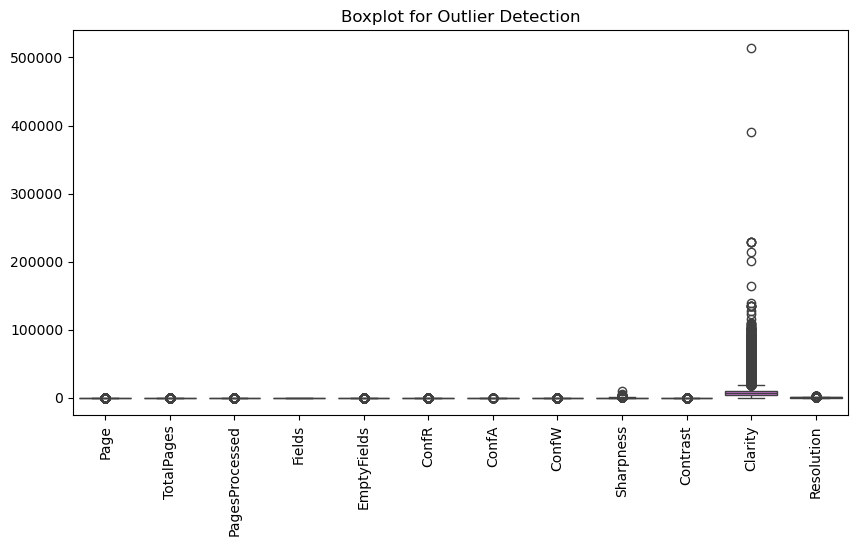

In [78]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=numeric_df)
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

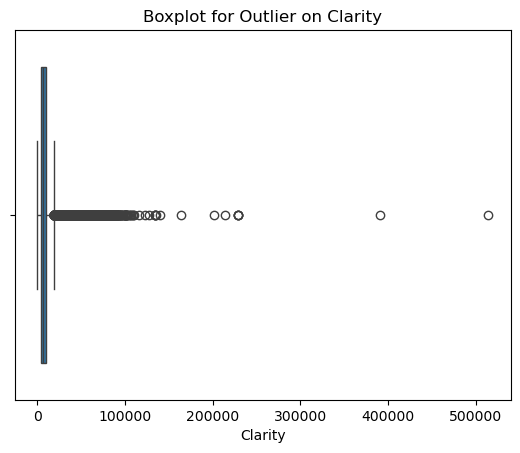

In [79]:
sns.boxplot(x=df["Clarity"])
plt.title("Boxplot for Outlier on Clarity")
plt.show()

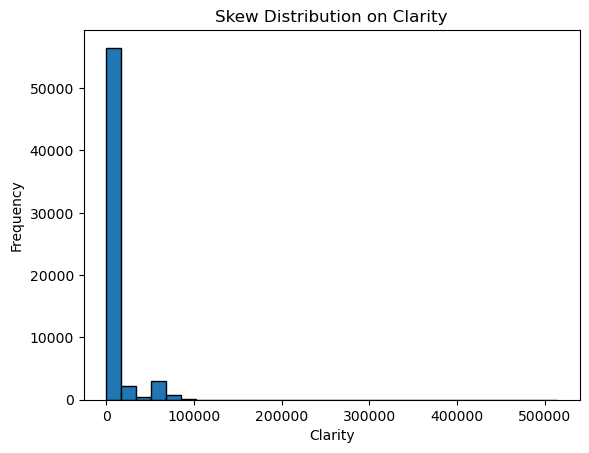

In [80]:
column = "Clarity"
plt.hist(df[column], bins=30, edgecolor="black")
plt.xlabel(column)
plt.ylabel("Frequency")
plt.title(f"Skew Distribution on {column}")
plt.show()

In [82]:
Q1 = df["Clarity"].quantile(0.25)  
Q3 = df["Clarity"].quantile(0.75)  
IQR = Q3 - Q1  
 
outliers = df[(df["Clarity"] < (Q1 - 1.5 * IQR)) | (df["Clarity"] > (Q3 + 1.5 * IQR))]
percentage = round((len(outliers) / len(df)) * 100,3)

print(f"{percentage} % of outliers on Clarity")

8.691 % of outliers on Clarity
